In [197]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

In [198]:
tra = pd.read_csv('/Users/suzukishinji/kaggle/recluit/air_visit_data.csv')
tes = pd.read_csv('/Users/suzukishinji/kaggle/recluit/sample_submission-3.csv')
#air_store =  pd.read_csv('/Users/suzukishinji/kaggle/recluit/air_store_info.csv')

In [108]:
tmp = tra.groupby(['air_store_id'], as_index = False)['visitors'].count().rename(columns = {'visitors':'count'})
tra = pd.merge(tra, tmp, how ='left', on = ['air_store_id'])
tra.head()

,air_store_id,visit_date,visitors,count
0,air_ba937bf13d40fb24,2016-01-13,25,391
1,air_ba937bf13d40fb24,2016-01-14,32,391
2,air_ba937bf13d40fb24,2016-01-15,29,391
3,air_ba937bf13d40fb24,2016-01-16,22,391
4,air_ba937bf13d40fb24,2016-01-18,6,391


(array([2.0000e+01, 0.0000e+00, 1.2800e+02, 1.5800e+02, 6.2000e+01,
        2.7700e+02, 2.4300e+02, 9.0000e+01, 2.9200e+02, 1.1100e+02,
        3.4500e+02, 2.4400e+02, 4.0400e+02, 0.0000e+00, 9.0400e+02,
        8.0900e+02, 8.5600e+02, 7.1600e+02, 1.7050e+03, 2.3820e+03,
        2.4890e+03, 4.7900e+03, 6.9880e+03, 1.0566e+04, 1.5353e+04,
        1.3623e+04, 9.1650e+03, 1.0014e+04, 1.5711e+04, 2.6697e+04,
        5.3370e+03, 3.1000e+02, 2.5420e+03, 1.9670e+03, 2.0110e+03,
        3.4490e+03, 2.1310e+03, 2.5440e+03, 4.0850e+03, 8.3900e+03,
        7.4120e+03, 1.1976e+04, 1.1004e+04, 7.1100e+03, 9.4000e+03,
        3.4820e+03, 6.6650e+03, 9.5460e+03, 1.0628e+04, 1.6977e+04]),
 array([ 20.  ,  29.14,  38.28,  47.42,  56.56,  65.7 ,  74.84,  83.98,
         93.12, 102.26, 111.4 , 120.54, 129.68, 138.82, 147.96, 157.1 ,
        166.24, 175.38, 184.52, 193.66, 202.8 , 211.94, 221.08, 230.22,
        239.36, 248.5 , 257.64, 266.78, 275.92, 285.06, 294.2 , 303.34,
        312.48, 321.62, 330.76

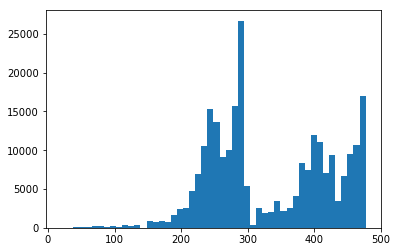

In [109]:
pd.set_option('display.float_format', lambda X: '%.3f' % X)
%matplotlib inline
plt.hist(tra['count'], bins=50)

In [114]:
count = tra[tra['count'] > 320]
count.tail(20)

,air_store_id,visit_date,visitors,count
251854,air_c7d30ab0e07f31d5,2017-04-01,14,346
251855,air_c7d30ab0e07f31d5,2017-04-02,1,346
251856,air_c7d30ab0e07f31d5,2017-04-03,15,346
251857,air_c7d30ab0e07f31d5,2017-04-04,7,346
251858,air_c7d30ab0e07f31d5,2017-04-05,26,346
251859,air_c7d30ab0e07f31d5,2017-04-06,20,346
251860,air_c7d30ab0e07f31d5,2017-04-07,20,346
251861,air_c7d30ab0e07f31d5,2017-04-08,7,346
251862,air_c7d30ab0e07f31d5,2017-04-10,6,346
251863,air_c7d30ab0e07f31d5,2017-04-11,13,346


In [115]:
count['air_store_id'].count()

118777

In [199]:
tra['visit_date'] = pd.to_datetime(tra['visit_date'])
tra['visit_date'] = pd.to_datetime(tra['visit_date'])
tra['dow'] = tra['visit_date'].dt.dayofweek
tra['year'] = tra['visit_date'].dt.year
tra['month'] = tra['visit_date'].dt.month
tra['visit_date'] = tra['visit_date'].dt.date

In [200]:
year_2016 = tra[tra['year'] == 2016]
month_1 = year_2016[year_2016['month'] == 1]
month_2 = year_2016[year_2016['month'] == 2]
month_3 = year_2016[year_2016['month'] == 3]
month_4 = year_2016[year_2016['month'] == 4]
month_5 = year_2016[year_2016['month'] == 5]
month_6 = year_2016[year_2016['month'] == 6]
tra_store_316_6 = pd.concat([month_1,month_2,month_3,month_4,month_5,month_6])

In [201]:
id = list(tra_store_316_6['air_store_id'].values.flatten())

In [202]:
tra_store_316_all = tra[tra['air_store_id'].isin(id)]
tra_store_513 = tra[~tra['air_store_id'].isin(id)]
#data[data['a'].isin([1,2])]

In [203]:
tes['visit_date'] = tes['id'].map(lambda x: str(x).split('_')[2])
tes['air_store_id'] = tes['id'].map(lambda x: '_'.join(x.split('_')[:2]))
tes['visit_date'] = pd.to_datetime(tes['visit_date'])
tes['dow'] = tes['visit_date'].dt.dayofweek
tes['year'] = tes['visit_date'].dt.year
tes['month'] = tes['visit_date'].dt.month
tes['visit_date'] = tes['visit_date'].dt.date

In [204]:
tes_store_316 = tes[tes['air_store_id'].isin(id)]
tes_store_513 = tes[~tes['air_store_id'].isin(id)]

In [205]:
tra_store_513_316 = pd.concat([tra_316_6, tra_513])

In [206]:
tra_store_316_6[['air_store_id', 'visit_date','visitors']].to_csv('tra_store_316_6.csv', index = False)
tra_store_316_all[['air_store_id', 'visit_date','visitors']].to_csv('tra_store_316_all.csv', index = False)
tra_store_513_316[['air_store_id', 'visit_date','visitors']].to_csv('tra_store_513.csv', index = False)

tes_store_316[['id','visitors']].to_csv('tes_store_316.csv', index = False)
tes_store_513[['id','visitors']].to_csv('tes_store_513.csv', index = False)

In [207]:
tra_316_6 = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tra_store_316_6.csv')
tra_316_all = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tra_store_316_all.csv')
tra_513 = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tra_store_513.csv')
tes_316 = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tes_store_316.csv')
tes_513 = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tes_store_513.csv')

In [208]:
print(tra.shape)
print(tra_316_6.shape)
print(tra_316_all.shape)
print(tra_513.shape)
print()
tra_513_316 = pd.concat([tra_316_6, tra_513])
print(tra_513_316.shape)
print()
print(tes.shape)
print(tes_316.shape)
print(tes_513.shape)

(252108, 6)
(47699, 3)
(126700, 3)
(220806, 3)

(268505, 3)

(32019, 7)
(12207, 2)
(19812, 2)


In [210]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

tra = pd.read_csv('/Users/suzukishinji/kaggle/recluit/air_visit_data.csv')
tes = pd.read_csv('/Users/suzukishinji/kaggle/recluit/sample_submission-3.csv')

#あとでデータ数を確認するため
print(tra.shape)
print(tes.shape)
print('↑元データ')

#countで試してみましたが、「2016年初めからデータはあるものの営業日の少ないお店」と「データは途中からだけど営業日の多い店」が混じるため、2016/1~2016/6に営業していた店と営業していないお店という分け方をしてみました。

tra['visit_date'] = pd.to_datetime(tra['visit_date'])
tra['visit_date'] = pd.to_datetime(tra['visit_date'])
tra['dow'] = tra['visit_date'].dt.dayofweek
tra['year'] = tra['visit_date'].dt.year
tra['month'] = tra['visit_date'].dt.month
tra['visit_date'] = tra['visit_date'].dt.date

tes['visit_date'] = tes['id'].map(lambda x: str(x).split('_')[2])
tes['air_store_id'] = tes['id'].map(lambda x: '_'.join(x.split('_')[:2]))
tes['visit_date'] = pd.to_datetime(tes['visit_date'])
tes['dow'] = tes['visit_date'].dt.dayofweek
tes['year'] = tes['visit_date'].dt.year
tes['month'] = tes['visit_date'].dt.month
tes['visit_date'] = tes['visit_date'].dt.date

#リョウさんのGW_flagを利用させて頂きました（ここの日付の範囲は適当に3週間としたので変更しても良いと思います）
combine = [tra, tes]
gw_list = ['2016-04-23','2016-04-24','2016-04-25','2016-04-26','2016-04-27','2016-04-28','2016-04-29','2016-04-30','2016-04-23','2016-05-01','2016-05-02','2016-05-03','2016-05-04','2016-05-05','2016-05-06','2016-05-07','2016-05-08','2016-05-09','2016-05-10','2016-05-11','2016-05-12','2016-05-13','2016-05-14','2016-05-15','2017-04-22','2017-04-23','2017-04-24','2017-04-25','2017-04-26','2017-04-27','2017-04-28','2017-04-29','2017-04-30','2017-05-01','2017-05-02','2017-05-03','2017-05-04','2017-05-05','2017-05-06','2017-05-07','2017-05-08','2017-05-09','2017-05-10','2017-05-11','2017-05-12','2017-05-13','2017-05-14']
tra['gw_flg'] = 0
tes['gw_flg'] = 0
update_gw_list = [["0" for i in range(3)] for j in range(len(gw_list))]

from datetime import date
for index, gw_date in enumerate(gw_list):
    temp_list = gw_date.split("-")
    for col_i, temp_figure in enumerate(temp_list):
        update_gw_list[index][col_i]=int(temp_figure)
        
    #print("{}  {}  {}".format(update_list[index][0],update_list[index][1],update_list[index][2]))

for dataset in combine:
    for index in range(len(update_gw_list)):
        dataset.loc[dataset.visit_date == date(update_gw_list[index][0],update_gw_list[index][1],update_gw_list[index][2]), 'gw_flg'] = 1

#gw部分とそれ以外を分けます。
tra_gw = tra[tra['gw_flg'] == 1]
tra = tra[tra['gw_flg'] == 0]

tes_gw = tes[tes['gw_flg'] == 1]
tes = tes[tes['gw_flg'] == 0]

#2016/1~2016/6に営業しているお店は316店舗でした。
year_2016 = tra[tra['year'] == 2016]
month_1 = year_2016[year_2016['month'] == 1]
month_2 = year_2016[year_2016['month'] == 2]
month_3 = year_2016[year_2016['month'] == 3]
month_4 = year_2016[year_2016['month'] == 4]
month_5 = year_2016[year_2016['month'] == 5]
month_6 = year_2016[year_2016['month'] == 6]
tra_store_316_6 = pd.concat([month_1,month_2,month_3,month_4,month_5,month_6])

id = list(tra_store_316_6['air_store_id'].values.flatten())

#trainデータから2016/1~2016/6に営業しているお店の全期間を抜き出したもの。
#trainデータから上記を除いたものが513店舗。
tra_store_316_all = tra[tra['air_store_id'].isin(id)]
tra_store_513 = tra[~tra['air_store_id'].isin(id)]

#testデータから2016/1~2016/6に営業しているお店の全期間を抜き出したもの。
#testデータから上記を除いたものが513店舗。
tes_store_316 = tes[tes['air_store_id'].isin(id)]
tes_store_513 = tes[~tes['air_store_id'].isin(id)]


#使うのは①2016/1~2016/6の期間のデータ、②2016/1~2016/6に営業していたお店の全期間のデータ、③途中からの513店舗のデータ。
tra_store_316_6[['air_store_id', 'visit_date','visitors']].to_csv('tra_store_316_6.csv', index = False)
tra_store_316_all[['air_store_id', 'visit_date','visitors']].to_csv('tra_store_316_all.csv', index = False)
tra_store_513[['air_store_id', 'visit_date','visitors']].to_csv('tra_store_513.csv', index = False)
tra_gw[['air_store_id', 'visit_date','visitors']].to_csv('tra_gw.csv', index = False)

#テストデータは期間で分けずに最初からの316店舗と途中からの513店舗
tes_store_316[['id','visitors']].to_csv('tes_store_316.csv', index = False)
tes_store_513[['id','visitors']].to_csv('tes_store_513.csv', index = False)
tes_gw[['id','visitors']].to_csv('tes_gw.csv', index = False)


tra_316_6 = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tra_store_316_6.csv')
tra_316_all = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tra_store_316_all.csv')
tra_513 = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tra_store_513.csv')
tra_gw = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tra_gw.csv')

tes_316 = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tes_store_316.csv')
tes_513 = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tes_store_513.csv')
tes_gw = pd.read_csv('/Users/suzukishinji/kaggle/recluit/tes_gw.csv')

#出力されているか確認。（①と③はくっつけて使う）
print(tra_316_6.shape)
print(tra_316_all.shape)
print(tra_513.shape)
print(tra_gw.shape)
print()
tra_513_316 = pd.concat([tra_316_6, tra_513])
print(tra_513_316.shape)
print()
print(tes_316.shape)
print(tes_513.shape)
print(tes_gw.shape)

(252108, 3)
(32019, 2)
↑元データ
(245315, 7)
(41680, 3)
(120382, 3)
(124933, 3)
(6793, 3)

(166613, 3)

(13957, 8)
(5321, 2)
(8636, 2)
(18062, 2)
